<a href="https://colab.research.google.com/github/Jgallear/CSSP_brazil_23_24/blob/main/regrid_brazil_spi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy

In [ ]:
#import rioxarray as riox
#from rasterio.enums import Resampling
import xarray as xr
#from rasterio import CRS
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
#import netCDF4 as nc
from scipy.stats import pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load csv files of spi data
spi01 = pd.read_csv('/content/drive/MyDrive/rs_data/spi_gpcc/spi_01_brazil_1deg_df.csv')
spi02 = pd.read_csv('/content/drive/MyDrive/rs_data/spi_gpcc/spi_02_brazil_1deg_df.csv')
spi03 = pd.read_csv('/content/drive/MyDrive/rs_data/spi_gpcc/spi_03_brazil_1deg_df.csv')

In [ ]:
print(spi03)

         lat   lon        time  spatial_ref    spi_03  year  month
0        4.5 -60.5  2003-01-01            0 -0.357679  2003      1
1        4.5 -60.5  2003-02-01            0 -1.304348  2003      2
2        4.5 -60.5  2003-03-01            0 -1.033546  2003      3
3        4.5 -60.5  2003-04-01            0 -0.692711  2003      4
4        4.5 -60.5  2003-05-01            0 -0.093921  2003      5
...      ...   ...         ...          ...       ...   ...    ...
178891 -32.5 -52.5  2023-08-01            0  0.701904  2023      8
178892 -32.5 -52.5  2023-09-01            0  2.183950  2023      9
178893 -32.5 -52.5  2023-10-01            0  1.431994  2023     10
178894 -32.5 -52.5  2023-11-01            0  2.678096  2023     11
178895 -32.5 -52.5  2023-12-01            0  1.716523  2023     12

[178896 rows x 7 columns]


In [ ]:
print(spi01)

         lat   lon        time  spatial_ref    spi_01  year  month
0        4.5 -60.5  2003-01-01            0 -0.693519  2003      1
1        4.5 -60.5  2003-02-01            0 -0.687153  2003      2
2        4.5 -60.5  2003-03-01            0 -0.226335  2003      3
3        4.5 -60.5  2003-04-01            0 -0.373640  2003      4
4        4.5 -60.5  2003-05-01            0  0.421396  2003      5
...      ...   ...         ...          ...       ...   ...    ...
178834 -32.5 -52.5  2023-08-01            0  0.309185  2023      8
178835 -32.5 -52.5  2023-09-01            0  2.814208  2023      9
178836 -32.5 -52.5  2023-10-01            0 -0.606474  2023     10
178837 -32.5 -52.5  2023-11-01            0  2.129569  2023     11
178838 -32.5 -52.5  2023-12-01            0  1.793649  2023     12

[178839 rows x 7 columns]


In [ ]:
print(spi02)

         lat   lon        time  spatial_ref    spi_02  year  month
0        4.5 -60.5  2003-01-01            0 -0.939849  2003      1
1        4.5 -60.5  2003-02-01            0 -1.088430  2003      2
2        4.5 -60.5  2003-03-01            0 -0.721135  2003      3
3        4.5 -60.5  2003-04-01            0 -0.412170  2003      4
4        4.5 -60.5  2003-05-01            0  0.103170  2003      5
...      ...   ...         ...          ...       ...   ...    ...
178882 -32.5 -52.5  2023-08-01            0  1.041841  2023      8
178883 -32.5 -52.5  2023-09-01            0  1.951227  2023      9
178884 -32.5 -52.5  2023-10-01            0  1.953837  2023     10
178885 -32.5 -52.5  2023-11-01            0  1.244457  2023     11
178886 -32.5 -52.5  2023-12-01            0  2.413587  2023     12

[178887 rows x 7 columns]


In [ ]:
# remove jan 2003
#spi01 = spi01[(spi01['year'] >= 2003) & (spi01['month'] >=2 )]
#spi02 = spi02[(spi02['year'] >= 2003) & (spi02['month'] >=2 )]
#spi03 = spi03[(spi03['year'] >= 2003) & (spi03['month'] >=2 )]

# replace with new code to remove jan 03
#test_spi = spi01[spi01['month']==1]
#print(test_spi)
#################
spi01 = spi01.drop(spi01[(spi01['year']==2003) & (spi01['month']==1)].index)
spi02 = spi02.drop(spi02[(spi02['year']==2003) & (spi02['month']==1)].index)
spi03 = spi03.drop(spi03[(spi03['year']==2003) & (spi03['month']==1)].index)
test_spi = spi01[spi01['month']==1]
print(test_spi)

         lat   lon        time  spatial_ref    spi_01  year  month
12       4.5 -60.5  2004-01-01            0  1.578912  2004      1
24       4.5 -60.5  2005-01-01            0  2.355887  2005      1
36       4.5 -60.5  2006-01-01            0  1.643251  2006      1
48       4.5 -60.5  2007-01-01            0 -0.693519  2007      1
60       4.5 -60.5  2008-01-01            0 -0.257130  2008      1
...      ...   ...         ...          ...       ...   ...    ...
178779 -32.5 -52.5  2019-01-01            0  1.908055  2019      1
178791 -32.5 -52.5  2020-01-01            0 -0.001408  2020      1
178803 -32.5 -52.5  2021-01-01            0  1.495325  2021      1
178815 -32.5 -52.5  2022-01-01            0  0.865977  2022      1
178827 -32.5 -52.5  2023-01-01            0 -0.133869  2023      1

[14200 rows x 7 columns]


In [ ]:
print(spi03)

         lat   lon        time  spatial_ref    spi_03  year  month
1        4.5 -60.5  2003-02-01            0 -1.304348  2003      2
2        4.5 -60.5  2003-03-01            0 -1.033546  2003      3
3        4.5 -60.5  2003-04-01            0 -0.692711  2003      4
4        4.5 -60.5  2003-05-01            0 -0.093921  2003      5
5        4.5 -60.5  2003-06-01            0  0.435010  2003      6
...      ...   ...         ...          ...       ...   ...    ...
178891 -32.5 -52.5  2023-08-01            0  0.701904  2023      8
178892 -32.5 -52.5  2023-09-01            0  2.183950  2023      9
178893 -32.5 -52.5  2023-10-01            0  1.431994  2023     10
178894 -32.5 -52.5  2023-11-01            0  2.678096  2023     11
178895 -32.5 -52.5  2023-12-01            0  1.716523  2023     12

[178186 rows x 7 columns]


In [ ]:
# remove years after 2021
spi01 = spi01[spi01['year']<2022]
print(spi01)
spi02 = spi02[spi02['year']<2022]
spi03 = spi03[spi03['year']<2022]

         lat   lon        time  spatial_ref    spi_01  year  month
1        4.5 -60.5  2003-02-01            0 -0.687153  2003      2
2        4.5 -60.5  2003-03-01            0 -0.226335  2003      3
3        4.5 -60.5  2003-04-01            0 -0.373640  2003      4
4        4.5 -60.5  2003-05-01            0  0.421396  2003      5
5        4.5 -60.5  2003-06-01            0  0.873001  2003      6
...      ...   ...         ...          ...       ...   ...    ...
178810 -32.5 -52.5  2021-08-01            0  0.015077  2021      8
178811 -32.5 -52.5  2021-09-01            0  1.791211  2021      9
178812 -32.5 -52.5  2021-10-01            0 -1.191643  2021     10
178813 -32.5 -52.5  2021-11-01            0 -0.293031  2021     11
178814 -32.5 -52.5  2021-12-01            0 -1.740131  2021     12

[161133 rows x 7 columns]


In [ ]:
# Need to load the training dataframe with the coordinates which will form the new grid
df = pd.read_csv('/content/drive/MyDrive/rs_data/VHI_merged_weather_data.csv')
print(df)
# fewer januarys because no jan 03
print(df['month'].value_counts())

            lon     lat        VHI  year  month     precip  rtzsm_inst
0       -53.375 -33.625  51.021667  2003      2  259.88287   98.905430
1       -53.375 -33.375  56.413615  2003      2  263.87030   98.808440
2       -53.125 -33.375  51.933297  2003      2  264.47006   97.968110
3       -53.125 -33.125  56.654990  2003      2  272.27457   98.378110
4       -52.875 -33.125  49.726269  2003      2  257.30900   97.940735
...         ...     ...        ...   ...    ...        ...         ...
2567138 -60.375   4.875  62.075416  2021     12  150.79850   99.038830
2567139 -60.125   4.875  63.210981  2021     12  125.50701   93.635956
2567140 -60.625   5.125  61.006296  2021     12  169.49919   92.256210
2567141 -60.375   5.125  57.378575  2021     12  188.04920   99.967990
2567142 -60.125   5.125  58.236603  2021     12  198.82608  100.000000

[2567143 rows x 7 columns]
2     214871
3     214871
4     214871
5     214871
6     214871
7     214871
8     214871
9     214871
10    214871
11 

In [ ]:
#plot maps of df and spi next to each other to compare
dflat = df[df['year']==2003]['lat']
dflon = df[df['year']==2003]['lon']
pr03 = df[df['year']==2003]['precip']

In [ ]:
fname = '/content/drive/MyDrive/shapefiles/BR/BR_EST_SAD69.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')

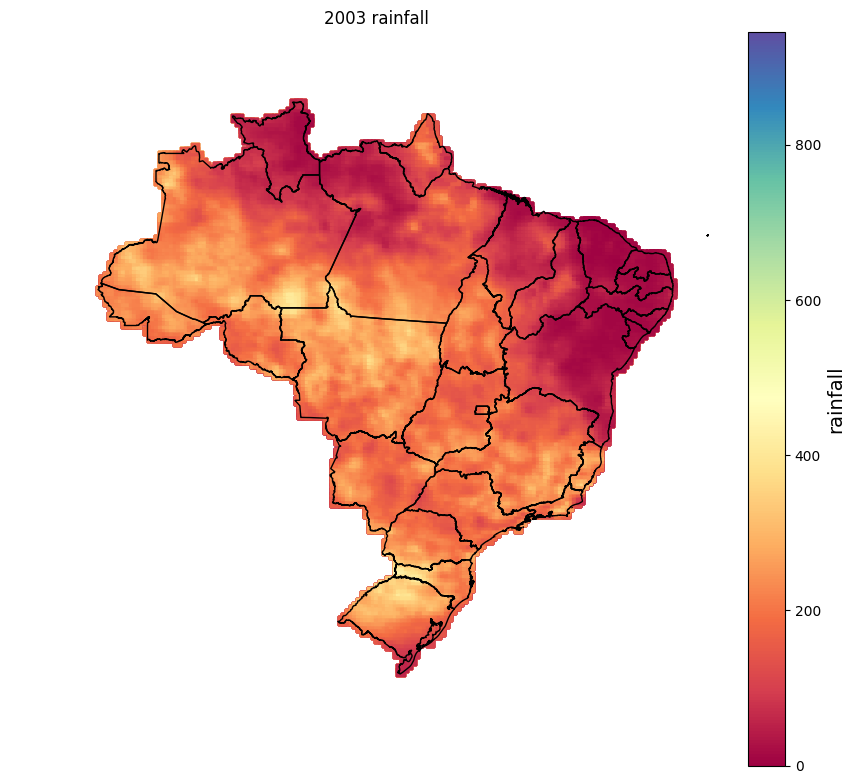

In [ ]:
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(dflon, dflat, c=pr03, marker=',', transform=ccrs.PlateCarree(), cmap='Spectral')
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('rainfall',fontsize='14')
ax1.title.set_text('2003 rainfall')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')
plt.show()

In [ ]:
splat = spi01[spi01['year']==2003]['lat']
splon = spi01[spi01['year']==2003]['lon']
spi01_2003 = spi01[spi01['year']==2003]['spi_01']

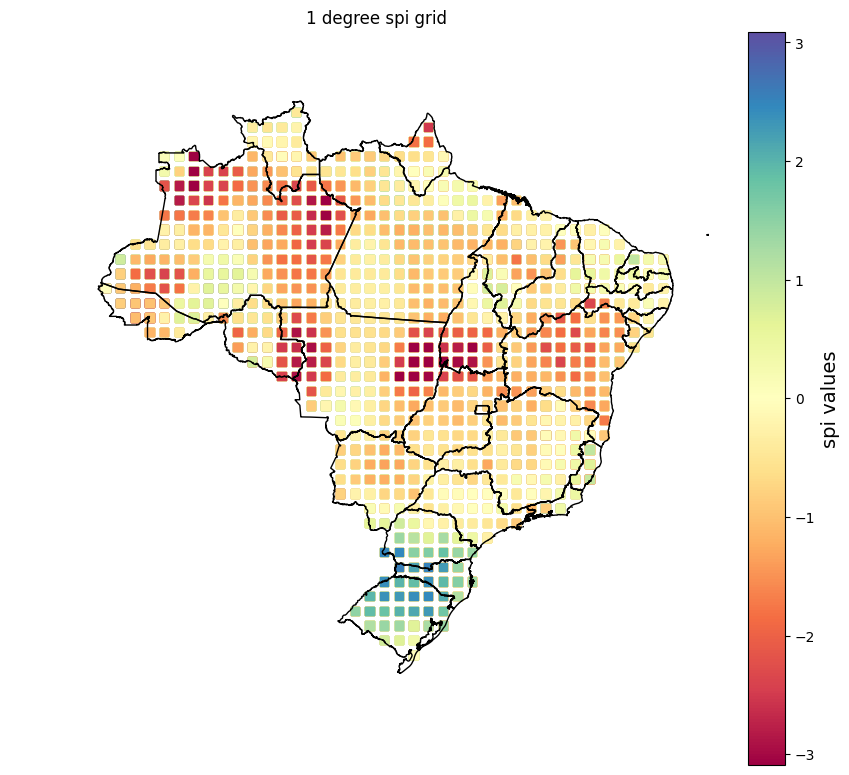

In [ ]:
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(splon, splat, c=spi01_2003, marker=',', transform=ccrs.PlateCarree(), cmap='Spectral')
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('spi values',fontsize='14')
ax1.title.set_text('1 degree spi grid')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')
plt.show()

In [ ]:
# train KNN model and predict on new grid to produce upscaled spi values

In [ ]:
# fit each month and year separately so groupby year into list

In [ ]:
#

In [ ]:
# trainx are coordinates y is spi values, test is the new coordinates from df

In [ ]:
def groupby_year(df):
  df_list=[]
  for index,df in df.groupby(['year']):
    df_list.append(df)
  return df_list

In [ ]:
def groupby_month(df):
  df_list=[]
  for index,df in df.groupby(['month']):
    df_list.append(df)
  return df_list

In [ ]:
def groupby_month_year(df):
  df_list=[]
  for index,df in df.groupby(['month','year']):
    df_list.append(df)
  return df_list

In [ ]:
def nested_groupby_m_y(df):
  y_list = groupby_year(df)
  list_list=[]
  for i in range(len(y_list)):
    ym_list = groupby_month(y_list[i])
    list_list.append(ym_list)
  return list_list

In [ ]:
# need nested list of groupby year then groupby month
n_list_df = nested_groupby_m_y(df)

<ipython-input-41-527e21b768c6>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['year']):
<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):
<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):
<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned w

In [ ]:
print(n_list_df[2][11])

           lon     lat        VHI  year  month      precip  rtzsm_inst
384506 -53.375 -33.625  30.920992  2005     12   63.555350   40.080480
384507 -53.375 -33.375  36.111179  2005     12   63.382698   40.689125
384508 -53.125 -33.375  32.303908  2005     12   63.829200   57.859440
384509 -53.125 -33.125  44.125802  2005     12   66.472305   49.220882
384510 -52.875 -33.125  39.111663  2005     12   67.188354   41.463898
...        ...     ...        ...   ...    ...         ...         ...
395810 -60.375   4.875  52.280528  2005     12   73.572010   50.712400
395811 -60.125   4.875  57.674233  2005     12   63.545170   42.623670
395812 -60.625   5.125  50.736741  2005     12  113.536330   41.742645
395813 -60.375   5.125  45.617905  2005     12  124.665560   44.670420
395814 -60.125   5.125  51.582679  2005     12  127.862480   52.826004

[11309 rows x 7 columns]


In [ ]:
def make_lists(df,n_list_df,var='spi_01'):
  # make nested list to fit knn model to with each value being each month for each year
  # groupby year first
  df_yr_list = groupby_year(df)
  nlist2=[]
  for i in range(len(df_yr_list)):
    dfi_per_month = groupby_month(df_yr_list[i])
    nlist1=[]
    for j in range(len(dfi_per_month)):
      # use dfi per month as training/ testing for each month
      #print(dfi_per_month[j])
      dfij = dfi_per_month[j]
      # Get coordinates from

      train_dfij = pd.DataFrame({'lat':dfij['lat'],'lon':dfij['lon'],var:dfij[var]})
      #print(train_dfij)
      print(train_dfij)
      trainxij = train_dfij.drop(columns=[var])
      trainyij = train_dfij[var]
      KNR = KNeighborsRegressor()
      KNR.fit(trainxij,trainyij)
      # use trained KNR model to predict SPI on new upscaled set of coordinates
      new_coords = pd.DataFrame({'lat':n_list_df[i][j]['lat'],'lon':n_list_df[i][j]['lon']})
      upscaled_spi = KNR.predict(new_coords)
      print(upscaled_spi)
      n_list_df[i][j][var] = upscaled_spi
      nlist1.append(n_list_df[i][j])
    nlist2.append(nlist1)
      # Need to append month and year to df2
  return nlist2



In [ ]:
upscaled_coords = pd.DataFrame({'lat':dflat,'lon':dflon})

In [ ]:
n_list_df2_spi1 = make_lists(spi01,n_list_df)

         lat   lon    spi_01
1        4.5 -60.5 -0.687153
253      3.5 -63.5 -0.885771
505      3.5 -62.5 -0.963208
757      3.5 -61.5 -0.853236
1009     3.5 -60.5 -0.635957
...      ...   ...       ...
177580 -30.5 -50.5  1.401158
177832 -31.5 -54.5  1.919809
178084 -31.5 -53.5  1.771115
178336 -31.5 -52.5  1.680512
178588 -32.5 -52.5  1.873924

[710 rows x 3 columns]
[ 1.7180096   1.7180096   1.7180096  ... -0.75803774 -0.75803774
 -0.75803774]
         lat   lon    spi_01
2        4.5 -60.5 -0.226335
254      3.5 -63.5 -0.562848
506      3.5 -62.5 -0.448589
758      3.5 -61.5 -0.202610
1010     3.5 -60.5 -0.227420
...      ...   ...       ...
177581 -30.5 -50.5  0.328219
177833 -31.5 -54.5  1.105090
178085 -31.5 -53.5  1.202302
178337 -31.5 -52.5  0.691036
178589 -32.5 -52.5  0.610951

[710 rows x 3 columns]
[ 1.01502165  1.01502165  1.01502165 ... -0.35521077 -0.35521077
 -0.35521077]
         lat   lon    spi_01
3        4.5 -60.5 -0.373640
255      3.5 -63.5 -0.614375
507      3.

<ipython-input-41-527e21b768c6>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['year']):
<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.25592271 0.25592271 0.25592271 ... 0.22776427 0.22776427 0.22776427]
         lat   lon    spi_01
10       4.5 -60.5  1.826534
262      3.5 -63.5  1.625379
514      3.5 -62.5  1.796054
766      3.5 -61.5  1.444322
1018     3.5 -60.5  0.879035
...      ...   ...       ...
177589 -30.5 -50.5  0.798962
177841 -31.5 -54.5  1.109194
178093 -31.5 -53.5  0.715585
178345 -31.5 -52.5  0.423327
178597 -32.5 -52.5  0.251793

[710 rows x 3 columns]
[0.70945361 0.70945361 0.70945361 ... 1.13457328 1.13457328 1.13457328]
         lat   lon    spi_01
11       4.5 -60.5 -0.449489
263      3.5 -63.5 -0.376808
515      3.5 -62.5 -0.528597
767      3.5 -61.5 -0.431165
1019     3.5 -60.5 -0.221616
...      ...   ...       ...
177590 -30.5 -50.5  1.399944
177842 -31.5 -54.5  0.840257
178094 -31.5 -53.5  0.679233
178346 -31.5 -52.5  0.357068
178598 -32.5 -52.5 -0.042111

[710 rows x 3 columns]
[ 0.63718225  0.63718225  0.63718225 ... -0.40436721 -0.40436721
 -0.40436721]
         lat   lon    spi_01
12  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.56633639  0.56633639  0.56633639 ... -0.41651836 -0.41651836
 -0.41651836]
         lat   lon    spi_01
23       4.5 -60.5 -0.196261
275      3.5 -63.5 -0.176186
527      3.5 -62.5 -0.357938
779      3.5 -61.5 -0.416654
1031     3.5 -60.5 -0.569746
...      ...   ...       ...
177602 -30.5 -50.5 -1.261884
177854 -31.5 -54.5 -0.825899
178106 -31.5 -53.5 -0.582795
178358 -31.5 -52.5 -0.322481
178610 -32.5 -52.5 -0.344394

[710 rows x 3 columns]
[-0.50451962 -0.50451962 -0.50451962 ... -0.45248855 -0.45248855
 -0.45248855]
         lat   lon    spi_01
24       4.5 -60.5  2.355887
276      3.5 -63.5  2.111658
528      3.5 -62.5  2.396155
780      3.5 -61.5  2.079742
1032     3.5 -60.5  1.458412
...      ...   ...       ...
177603 -30.5 -50.5 -1.368484
177855 -31.5 -54.5 -0.729496
178107 -31.5 -53.5 -0.214119
178359 -31.5 -52.5  0.185901
178611 -32.5 -52.5 -1.064414

[710 rows x 3 columns]
[-0.32543208 -0.32543208 -0.32543208 ...  1.79286988  1.79286988
  1.79286988]
         lat   lon 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.8362734  0.8362734  0.8362734  ... 0.05610894 0.05610894 0.05610894]
         lat   lon    spi_01
34       4.5 -60.5 -0.072724
286      3.5 -63.5 -0.134285
538      3.5 -62.5 -0.153249
790      3.5 -61.5  0.011341
1042     3.5 -60.5 -0.088406
...      ...   ...       ...
177613 -30.5 -50.5  0.079488
177865 -31.5 -54.5 -1.349938
178117 -31.5 -53.5 -0.940201
178369 -31.5 -52.5 -0.251338
178621 -32.5 -52.5 -0.781132

[710 rows x 3 columns]
[-0.76082314 -0.76082314 -0.76082314 ... -0.15091464 -0.15091464
 -0.15091464]
         lat   lon    spi_01
35       4.5 -60.5  1.311727
287      3.5 -63.5  0.636759
539      3.5 -62.5  0.684052
791      3.5 -61.5  0.526201
1043     3.5 -60.5  0.161909
...      ...   ...       ...
177614 -30.5 -50.5 -0.664349
177866 -31.5 -54.5 -0.612414
178118 -31.5 -53.5 -0.336104
178370 -31.5 -52.5  0.019979
178622 -32.5 -52.5 -0.114087

[710 rows x 3 columns]
[-0.24221243 -0.24221243 -0.24221243 ...  0.54003137  0.54003137
  0.54003137]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.1638682  -0.1638682  -0.1638682  ... -0.41716692 -0.41716692
 -0.41716692]
         lat   lon    spi_01
45       4.5 -60.5 -1.160308
297      3.5 -63.5 -0.364130
549      3.5 -62.5 -0.379912
801      3.5 -61.5 -0.398507
1053     3.5 -60.5 -0.743099
...      ...   ...       ...
177624 -30.5 -50.5 -1.864398
177876 -31.5 -54.5 -0.352090
178128 -31.5 -53.5 -0.326163
178380 -31.5 -52.5  0.300232
178632 -32.5 -52.5 -0.052062

[710 rows x 3 columns]
[ 0.01933759  0.01933759  0.01933759 ... -0.59333578 -0.59333578
 -0.59333578]
         lat   lon    spi_01
46       4.5 -60.5  0.103408
298      3.5 -63.5 -0.040784
550      3.5 -62.5 -0.009392
802      3.5 -61.5  0.269375
1054     3.5 -60.5  0.533590
...      ...   ...       ...
177625 -30.5 -50.5  0.684219
177877 -31.5 -54.5  0.582835
178129 -31.5 -53.5  0.862271
178381 -31.5 -52.5  0.788631
178633 -32.5 -52.5  0.494862

[710 rows x 3 columns]
[0.7194939  0.7194939  0.7194939  ... 0.26540671 0.26540671 0.26540671]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[1.36138791 1.36138791 1.36138791 ... 2.53695988 2.53695988 2.53695988]
         lat   lon    spi_01
56       4.5 -60.5  1.373344
308      3.5 -63.5  0.816404
560      3.5 -62.5  0.812012
812      3.5 -61.5  0.900536
1064     3.5 -60.5  0.810788
...      ...   ...       ...
177635 -30.5 -50.5  0.709990
177887 -31.5 -54.5 -1.214376
178139 -31.5 -53.5 -1.027682
178391 -31.5 -52.5  0.389647
178643 -32.5 -52.5 -0.086104

[710 rows x 3 columns]
[-0.29927894 -0.29927894 -0.29927894 ...  0.85402935  0.85402935
  0.85402935]
         lat   lon    spi_01
57       4.5 -60.5  0.633451
309      3.5 -63.5  0.837172
561      3.5 -62.5  1.065839
813      3.5 -61.5  1.170390
1065     3.5 -60.5  1.333025
...      ...   ...       ...
177636 -30.5 -50.5 -0.165615
177888 -31.5 -54.5  0.983477
178140 -31.5 -53.5  1.119588
178392 -31.5 -52.5  0.801451
178644 -32.5 -52.5  1.207084

[710 rows x 3 columns]
[0.95606937 0.95606937 0.95606937 ... 1.14242269 1.14242269 1.14242269]
         lat   lon    spi_01
58  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.50876341 0.50876341 0.50876341 ... 0.65144996 0.65144996 0.65144996]
         lat   lon    spi_01
67       4.5 -60.5  1.084987
319      3.5 -63.5  0.368099
571      3.5 -62.5  0.365430
823      3.5 -61.5  0.399076
1075     3.5 -60.5  0.189300
...      ...   ...       ...
177646 -30.5 -50.5  0.151195
177898 -31.5 -54.5  1.036821
178150 -31.5 -53.5  1.057581
178402 -31.5 -52.5  1.243001
178654 -32.5 -52.5  1.418813

[710 rows x 3 columns]
[1.05732779 1.05732779 1.05732779 ... 0.26713871 0.26713871 0.26713871]
         lat   lon    spi_01
68       4.5 -60.5 -0.319922
320      3.5 -63.5  0.227296
572      3.5 -62.5  0.478678
824      3.5 -61.5  0.711932
1076     3.5 -60.5  0.925486
...      ...   ...       ...
177647 -30.5 -50.5  0.513038
177899 -31.5 -54.5 -1.235222
178151 -31.5 -53.5 -0.664236
178403 -31.5 -52.5  0.359882
178655 -32.5 -52.5 -0.026323

[710 rows x 3 columns]
[-0.30172616 -0.30172616 -0.30172616 ...  0.58605437  0.58605437
  0.58605437]
         lat   lon    spi_01
69  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.18390571 -0.18390571 -0.18390571 ...  0.04884129  0.04884129
  0.04884129]
         lat   lon    spi_01
78       4.5 -60.5  0.096726
330      3.5 -63.5 -0.001473
582      3.5 -62.5 -0.003594
834      3.5 -61.5  0.021294
1086     3.5 -60.5 -0.118321
...      ...   ...       ...
177657 -30.5 -50.5 -0.997022
177909 -31.5 -54.5 -1.051982
178161 -31.5 -53.5 -0.846341
178413 -31.5 -52.5 -0.446935
178665 -32.5 -52.5 -0.901287

[710 rows x 3 columns]
[-0.73145544 -0.73145544 -0.73145544 ... -0.04235222 -0.04235222
 -0.04235222]
         lat   lon    spi_01
79       4.5 -60.5 -0.318030
331      3.5 -63.5 -0.455751
583      3.5 -62.5 -0.688487
835      3.5 -61.5 -0.834270
1087     3.5 -60.5 -1.108813
...      ...   ...       ...
177658 -30.5 -50.5  1.342201
177910 -31.5 -54.5  1.076634
178162 -31.5 -53.5  1.101193
178414 -31.5 -52.5  1.113247
178666 -32.5 -52.5  1.036593

[710 rows x 3 columns]
[ 1.11113566  1.11113566  1.11113566 ... -0.8732901  -0.8732901
 -0.8732901 ]
         lat   lon  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.41916993 0.41916993 0.41916993 ... 0.66629986 0.66629986 0.66629986]
         lat   lon    spi_01
89       4.5 -60.5 -0.482512
341      3.5 -63.5 -0.723076
593      3.5 -62.5 -0.802685
845      3.5 -61.5 -0.726979
1097     3.5 -60.5 -0.708515
...      ...   ...       ...
177668 -30.5 -50.5  1.106972
177920 -31.5 -54.5 -0.236471
178172 -31.5 -53.5  0.145664
178424 -31.5 -52.5  0.571831
178676 -32.5 -52.5  0.119876

[710 rows x 3 columns]
[ 0.24261936  0.24261936  0.24261936 ... -0.73154555 -0.73154555
 -0.73154555]
         lat   lon    spi_01
90       4.5 -60.5  1.363115
342      3.5 -63.5  0.667065
594      3.5 -62.5  0.462756
846      3.5 -61.5  0.282376
1098     3.5 -60.5  0.002310
...      ...   ...       ...
177669 -30.5 -50.5  0.946959
177921 -31.5 -54.5  1.678250
178173 -31.5 -53.5  1.427584
178425 -31.5 -52.5  1.346218
178677 -32.5 -52.5  1.771324

[710 rows x 3 columns]
[1.50392076 1.50392076 1.50392076 ... 0.38598292 0.38598292 0.38598292]
         lat   lon    spi_01
91  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.92701679 0.92701679 0.92701679 ... 1.1164984  1.1164984  1.1164984 ]
         lat   lon    spi_01
99       4.5 -60.5 -1.072888
351      3.5 -63.5 -1.073407
603      3.5 -62.5 -1.226114
855      3.5 -61.5 -1.214445
1107     3.5 -60.5 -1.330769
...      ...   ...       ...
177678 -30.5 -50.5  0.924466
177930 -31.5 -54.5  0.114658
178182 -31.5 -53.5  0.333597
178434 -31.5 -52.5  0.436157
178686 -32.5 -52.5  0.301774

[710 rows x 3 columns]
[ 0.35270889  0.35270889  0.35270889 ... -1.21996288 -1.21996288
 -1.21996288]
         lat   lon    spi_01
100      4.5 -60.5  0.698669
352      3.5 -63.5  1.410816
604      3.5 -62.5  1.832220
856      3.5 -61.5  1.826724
1108     3.5 -60.5  2.075603
...      ...   ...       ...
177679 -30.5 -50.5 -0.917782
177931 -31.5 -54.5 -0.146984
178183 -31.5 -53.5  0.149189
178435 -31.5 -52.5  0.348084
178687 -32.5 -52.5  0.814889

[710 rows x 3 columns]
[0.10684722 0.10684722 0.10684722 ... 1.74858485 1.74858485 1.74858485]
         lat   lon    spi_01
101 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.99681981 -0.99681981 -0.99681981 ...  0.83022014  0.83022014
  0.83022014]
         lat   lon    spi_01
109      4.5 -60.5  1.252698
361      3.5 -63.5  0.898367
613      3.5 -62.5  0.937836
865      3.5 -61.5  0.934883
1117     3.5 -60.5  0.726812
...      ...   ...       ...
177688 -30.5 -50.5  0.492120
177940 -31.5 -54.5  1.419198
178192 -31.5 -53.5  1.249517
178444 -31.5 -52.5  0.630065
178696 -32.5 -52.5  0.381727

[710 rows x 3 columns]
[0.99958604 0.99958604 0.99958604 ... 0.82716796 0.82716796 0.82716796]
         lat   lon    spi_01
110      4.5 -60.5 -0.631305
362      3.5 -63.5 -0.264102
614      3.5 -62.5 -0.246120
866      3.5 -61.5 -0.218808
1118     3.5 -60.5 -0.275407
...      ...   ...       ...
177689 -30.5 -50.5 -0.078044
177941 -31.5 -54.5  0.115538
178193 -31.5 -53.5  0.038487
178445 -31.5 -52.5 -0.223756
178697 -32.5 -52.5  0.092375

[710 rows x 3 columns]
[-0.25351792 -0.25351792 -0.25351792 ... -0.20127812 -0.20127812
 -0.20127812]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.86613223  0.86613223  0.86613223 ... -0.12367575 -0.12367575
 -0.12367575]
         lat   lon    spi_01
130      4.5 -60.5  1.459242
382      3.5 -63.5  0.885613
634      3.5 -62.5  1.092277
886      3.5 -61.5  1.237661
1138     3.5 -60.5  1.598605
...      ...   ...       ...
177709 -30.5 -50.5  0.822778
177961 -31.5 -54.5  1.708820
178213 -31.5 -53.5  1.418023
178465 -31.5 -52.5  1.212224
178717 -32.5 -52.5  1.105280

[710 rows x 3 columns]
[1.40770488 1.40770488 1.40770488 ... 1.42650018 1.42650018 1.42650018]
         lat   lon    spi_01
131      4.5 -60.5 -0.140072
383      3.5 -63.5 -0.035126
635      3.5 -62.5 -0.059548
887      3.5 -61.5  0.081649
1139     3.5 -60.5  0.254890
...      ...   ...       ...
177710 -30.5 -50.5 -0.254781
177962 -31.5 -54.5 -1.242349
178214 -31.5 -53.5 -0.219660
178466 -31.5 -52.5  0.237072
178718 -32.5 -52.5 -0.153327

[710 rows x 3 columns]
[-0.28721266 -0.28721266 -0.28721266 ...  0.1142629   0.1142629
  0.1142629 ]
         lat   lon    spi_0

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.60995774 -0.60995774 -0.60995774 ... -0.45746593 -0.45746593
 -0.45746593]
         lat   lon    spi_01
140      4.5 -60.5 -1.463871
392      3.5 -63.5 -1.158149
644      3.5 -62.5 -1.101256
896      3.5 -61.5 -1.473540
1148     3.5 -60.5 -1.937772
...      ...   ...       ...
177719 -30.5 -50.5  0.577152
177971 -31.5 -54.5  1.346418
178223 -31.5 -53.5  0.945865
178475 -31.5 -52.5  0.410942
178727 -32.5 -52.5  0.236103

[710 rows x 3 columns]
[ 0.80183578  0.80183578  0.80183578 ... -1.54963496 -1.54963496
 -1.54963496]
         lat   lon    spi_01
141      4.5 -60.5  0.979641
393      3.5 -63.5  0.605220
645      3.5 -62.5  0.600191
897      3.5 -61.5  0.587999
1149     3.5 -60.5  0.858563
...      ...   ...       ...
177720 -30.5 -50.5  0.787917
177972 -31.5 -54.5  1.357132
178224 -31.5 -53.5  1.612000
178476 -31.5 -52.5  1.676850
178728 -32.5 -52.5  2.230462

[710 rows x 3 columns]
[1.59640932 1.59640932 1.59640932 ... 0.80207147 0.80207147 0.80207147]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.63196481  0.63196481  0.63196481 ... -0.0712682  -0.0712682
 -0.0712682 ]
         lat   lon    spi_01
150      4.5 -60.5  0.564212
402      3.5 -63.5 -0.631137
654      3.5 -62.5 -0.575448
906      3.5 -61.5 -0.564272
1158     3.5 -60.5 -0.377453
...      ...   ...       ...
177729 -30.5 -50.5  2.080941
177981 -31.5 -54.5  0.927126
178233 -31.5 -53.5  1.303049
178485 -31.5 -52.5  1.361511
178737 -32.5 -52.5  0.383890

[710 rows x 3 columns]
[ 1.04195951  1.04195951  1.04195951 ... -0.24470245 -0.24470245
 -0.24470245]
         lat   lon    spi_01
151      4.5 -60.5  0.275824
403      3.5 -63.5 -0.196736
655      3.5 -62.5 -0.189073
907      3.5 -61.5 -0.038278
1159     3.5 -60.5  0.179246
...      ...   ...       ...
177730 -30.5 -50.5 -0.569829
177982 -31.5 -54.5  1.826941
178234 -31.5 -53.5  1.079412
178486 -31.5 -52.5  0.585645
178738 -32.5 -52.5  1.507560

[710 rows x 3 columns]
[1.04593586 1.04593586 1.04593586 ... 0.04002235 0.04002235 0.04002235]
         lat   lon    spi_0

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[2.03044292 2.03044292 2.03044292 ... 0.64303921 0.64303921 0.64303921]
         lat   lon    spi_01
160      4.5 -60.5  0.771654
412      3.5 -63.5  0.188979
664      3.5 -62.5  0.192108
916      3.5 -61.5  0.094675
1168     3.5 -60.5  0.096217
...      ...   ...       ...
177739 -30.5 -50.5 -0.688343
177991 -31.5 -54.5  0.050347
178243 -31.5 -53.5  0.009534
178495 -31.5 -52.5 -0.113745
178747 -32.5 -52.5 -0.060478

[710 rows x 3 columns]
[-0.08745013 -0.08745013 -0.08745013 ...  0.30295427  0.30295427
  0.30295427]
         lat   lon    spi_01
161      4.5 -60.5 -0.249846
413      3.5 -63.5  0.445319
665      3.5 -62.5  0.161504
917      3.5 -61.5 -0.096904
1169     3.5 -60.5 -0.187040
...      ...   ...       ...
177740 -30.5 -50.5 -2.785209
177992 -31.5 -54.5 -1.477545
178244 -31.5 -53.5 -1.286627
178496 -31.5 -52.5 -1.272062
178748 -32.5 -52.5 -1.618828

[710 rows x 3 columns]
[-1.38543712 -1.38543712 -1.38543712 ... -0.01450992 -0.01450992
 -0.01450992]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[1.17585738 1.17585738 1.17585738 ... 0.53318019 0.53318019 0.53318019]
         lat   lon    spi_01
171      4.5 -60.5  0.299529
423      3.5 -63.5 -0.493154
675      3.5 -62.5 -0.418784
927      3.5 -61.5 -0.173300
1179     3.5 -60.5  0.206185
...      ...   ...       ...
177750 -30.5 -50.5 -0.093560
178002 -31.5 -54.5  1.055709
178254 -31.5 -53.5  0.957927
178506 -31.5 -52.5  0.567743
178758 -32.5 -52.5  0.490288

[710 rows x 3 columns]
[ 0.6957502   0.6957502   0.6957502  ... -0.02895449 -0.02895449
 -0.02895449]
         lat   lon    spi_01
172      4.5 -60.5 -0.177868
424      3.5 -63.5 -0.250601
676      3.5 -62.5 -0.305567
928      3.5 -61.5 -0.212082
1180     3.5 -60.5 -0.190505
...      ...   ...       ...
177751 -30.5 -50.5  1.551018
178003 -31.5 -54.5  1.471284
178255 -31.5 -53.5  1.647403
178507 -31.5 -52.5  1.685119
178759 -32.5 -52.5  1.008633

[710 rows x 3 columns]
[ 1.52312036  1.52312036  1.52312036 ... -0.18462552 -0.18462552
 -0.18462552]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.94593909 -0.94593909 -0.94593909 ... -0.28491373 -0.28491373
 -0.28491373]
         lat   lon    spi_01
182      4.5 -60.5 -0.319400
434      3.5 -63.5 -0.734772
686      3.5 -62.5 -0.621409
938      3.5 -61.5 -0.466016
1190     3.5 -60.5 -0.537797
...      ...   ...       ...
177761 -30.5 -50.5  0.817720
178013 -31.5 -54.5  0.360943
178265 -31.5 -53.5  0.428452
178517 -31.5 -52.5  0.531521
178769 -32.5 -52.5 -0.077883

[710 rows x 3 columns]
[ 0.33112719  0.33112719  0.33112719 ... -0.53946074 -0.53946074
 -0.53946074]
         lat   lon    spi_01
183      4.5 -60.5  0.075171
435      3.5 -63.5  0.561161
687      3.5 -62.5  0.196794
939      3.5 -61.5  0.113112
1191     3.5 -60.5  0.138345
...      ...   ...       ...
177762 -30.5 -50.5 -0.060991
178014 -31.5 -54.5  0.414110
178266 -31.5 -53.5  0.743855
178518 -31.5 -52.5  1.403165
178770 -32.5 -52.5  0.740426

[710 rows x 3 columns]
[0.78719368 0.78719368 0.78719368 ... 0.239336   0.239336   0.239336  ]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 2.0637028   2.0637028   2.0637028  ... -0.58998624 -0.58998624
 -0.58998624]
         lat   lon    spi_01
193      4.5 -60.5 -0.537971
445      3.5 -63.5 -0.533213
697      3.5 -62.5 -0.553346
949      3.5 -61.5 -0.487302
1201     3.5 -60.5 -0.635957
...      ...   ...       ...
177772 -30.5 -50.5  0.064357
178024 -31.5 -54.5 -0.597546
178276 -31.5 -53.5 -0.576359
178528 -31.5 -52.5 -0.591307
178780 -32.5 -52.5 -0.366430

[710 rows x 3 columns]
[-0.44828314 -0.44828314 -0.44828314 ... -0.64543597 -0.64543597
 -0.64543597]
         lat   lon    spi_01
194      4.5 -60.5 -0.315348
446      3.5 -63.5 -0.902927
698      3.5 -62.5 -0.861911
950      3.5 -61.5 -0.681140
1202     3.5 -60.5 -0.599489
...      ...   ...       ...
177773 -30.5 -50.5 -0.109498
178025 -31.5 -54.5 -1.696636
178277 -31.5 -53.5 -1.354368
178529 -31.5 -52.5 -0.763916
178781 -32.5 -52.5 -0.928955

[710 rows x 3 columns]
[-1.0023016  -1.0023016  -1.0023016  ... -0.75078885 -0.75078885
 -0.75078885]
         lat   lon 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.52294197 -0.52294197 -0.52294197 ...  1.20478667  1.20478667
  1.20478667]
         lat   lon    spi_01
215      4.5 -60.5 -0.022288
467      3.5 -63.5  0.153385
719      3.5 -62.5 -0.013902
971      3.5 -61.5 -0.135938
1223     3.5 -60.5 -0.123825
...      ...   ...       ...
177794 -30.5 -50.5  0.217427
178046 -31.5 -54.5  0.265767
178298 -31.5 -53.5  0.376780
178550 -31.5 -52.5  0.130292
178802 -32.5 -52.5 -0.506067

[706 rows x 3 columns]
[0.06144633 0.06144633 0.06144633 ... 0.03962245 0.03962245 0.03962245]
         lat   lon    spi_01
216      4.5 -60.5  1.399467
468      3.5 -63.5  1.180883
720      3.5 -62.5  1.629185
972      3.5 -61.5  1.476287
1224     3.5 -60.5  1.822867
...      ...   ...       ...
177795 -30.5 -50.5  0.652922
178047 -31.5 -54.5  1.661536
178299 -31.5 -53.5  1.395361
178551 -31.5 -52.5  1.095395
178803 -32.5 -52.5  1.495325

[710 rows x 3 columns]
[1.31447676 1.31447676 1.31447676 ... 1.6756501  1.6756501  1.6756501 ]
         lat   lon    spi_01
217 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.70875391 -0.70875391 -0.70875391 ...  1.4098164   1.4098164
  1.4098164 ]
         lat   lon    spi_01
226      4.5 -60.5  0.034554
478      3.5 -63.5 -0.554976
730      3.5 -62.5 -0.270266
982      3.5 -61.5 -0.151669
1234     3.5 -60.5 -0.237052
...      ...   ...       ...
177805 -30.5 -50.5  0.088762
178057 -31.5 -54.5 -0.278722
178309 -31.5 -53.5 -0.159550
178561 -31.5 -52.5  0.044028
178813 -32.5 -52.5 -0.293031

[710 rows x 3 columns]
[-0.19547082 -0.19547082 -0.19547082 ... -0.25010614 -0.25010614
 -0.25010614]
         lat   lon    spi_01
227      4.5 -60.5  0.374140
479      3.5 -63.5 -0.260040
731      3.5 -62.5  0.259006
983      3.5 -61.5  0.422478
1235     3.5 -60.5  0.431225
...      ...   ...       ...
177806 -30.5 -50.5 -0.582215
178058 -31.5 -54.5 -0.444387
178310 -31.5 -53.5 -0.098957
178562 -31.5 -52.5 -0.256488
178814 -32.5 -52.5 -1.740131

[709 rows x 3 columns]
[-0.59495777 -0.59495777 -0.59495777 ...  0.44643562  0.44643562
  0.44643562]


In [ ]:
print(len(n_list_df2_spi1[0]))

# need to use loop to concat nested list of dfs

11


In [ ]:
def join_nested_dfs(n_list_df2):
  n_dfs_list=[]
  for i in range(len(n_list_df2)):
    nested_dfs = pd.concat(n_list_df2[i])
    n_dfs_list.append(nested_dfs)
  ####
  df_concats = pd.concat(n_dfs_list)
  return df_concats

In [ ]:
concat_df_spi1 = join_nested_dfs(n_list_df2_spi1)

In [ ]:
# Need to reproduce concat df for spi2 and spi3
print(spi02)

         lat   lon        time  spatial_ref    spi_02  year  month
1        4.5 -60.5  2003-02-01            0 -1.088430  2003      2
2        4.5 -60.5  2003-03-01            0 -0.721135  2003      3
3        4.5 -60.5  2003-04-01            0 -0.412170  2003      4
4        4.5 -60.5  2003-05-01            0  0.103170  2003      5
5        4.5 -60.5  2003-06-01            0  0.777430  2003      6
...      ...   ...         ...          ...       ...   ...    ...
178858 -32.5 -52.5  2021-08-01            0 -0.186102  2021      8
178859 -32.5 -52.5  2021-09-01            0  1.048623  2021      9
178860 -32.5 -52.5  2021-10-01            0  0.736078  2021     10
178861 -32.5 -52.5  2021-11-01            0 -0.986094  2021     11
178862 -32.5 -52.5  2021-12-01            0 -1.192805  2021     12

[161151 rows x 7 columns]


In [ ]:
# regrid spi2
n_list_df2_spi2 = make_lists(spi02,n_list_df,var='spi_02')
concat_df_spi2 = join_nested_dfs(n_list_df2_spi2)

         lat   lon    spi_02
1        4.5 -60.5 -1.088430
253      3.5 -63.5 -0.976095
505      3.5 -62.5 -1.133014
757      3.5 -61.5 -1.217103
1009     3.5 -60.5 -1.206581
...      ...   ...       ...
177628 -30.5 -50.5  1.259299
177880 -31.5 -54.5  1.271135
178132 -31.5 -53.5  1.116730
178384 -31.5 -52.5  1.101276
178636 -32.5 -52.5  1.168125

[710 rows x 3 columns]
[ 1.1316717   1.1316717   1.1316717  ... -1.14037592 -1.14037592
 -1.14037592]
         lat   lon    spi_02
2        4.5 -60.5 -0.721135
254      3.5 -63.5 -0.962611
506      3.5 -62.5 -0.890885
758      3.5 -61.5 -0.725708
1010     3.5 -60.5 -0.700136
...      ...   ...       ...
177629 -30.5 -50.5  1.151977
177881 -31.5 -54.5  1.806120
178133 -31.5 -53.5  1.744530
178385 -31.5 -52.5  1.429667
178637 -32.5 -52.5  1.663661

[710 rows x 3 columns]
[ 1.64568322  1.64568322  1.64568322 ... -0.81246763 -0.81246763
 -0.81246763]
         lat   lon    spi_02
3        4.5 -60.5 -0.412170
255      3.5 -63.5 -0.809948
507      3.

<ipython-input-41-527e21b768c6>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['year']):
<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.52090349 0.52090349 0.52090349 ... 0.9959188  0.9959188  0.9959188 ]
         lat   lon    spi_02
11       4.5 -60.5  1.048538
263      3.5 -63.5  1.005957
515      3.5 -62.5  1.057915
767      3.5 -61.5  0.810322
1019     3.5 -60.5  0.427984
...      ...   ...       ...
177638 -30.5 -50.5  1.331926
177890 -31.5 -54.5  1.110141
178142 -31.5 -53.5  0.782305
178394 -31.5 -52.5  0.408581
178646 -32.5 -52.5  0.066437

[710 rows x 3 columns]
[0.76442825 0.76442825 0.76442825 ... 0.55123542 0.55123542 0.55123542]
         lat   lon    spi_02
12       4.5 -60.5  0.764815
264      3.5 -63.5  0.720428
516      3.5 -62.5  0.780655
768      3.5 -61.5  0.505326
1020     3.5 -60.5  0.074741
...      ...   ...       ...
177639 -30.5 -50.5  0.474511
177891 -31.5 -54.5  0.196140
178143 -31.5 -53.5  0.172191
178395 -31.5 -52.5 -0.180530
178647 -32.5 -52.5 -0.553176

[710 rows x 3 columns]
[0.104849   0.104849   0.104849   ... 0.28384031 0.28384031 0.28384031]
         lat   lon    spi_02
13       4.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.12068576 0.12068576 0.12068576 ... 1.07271734 1.07271734 1.07271734]
         lat   lon    spi_02
22       4.5 -60.5  0.567434
274      3.5 -63.5  0.275939
526      3.5 -62.5  0.311325
778      3.5 -61.5  0.322212
1030     3.5 -60.5  0.110093
...      ...   ...       ...
177649 -30.5 -50.5 -0.073773
177901 -31.5 -54.5  0.464433
178153 -31.5 -53.5  0.423178
178405 -31.5 -52.5  0.421026
178657 -32.5 -52.5  0.952430

[710 rows x 3 columns]
[0.52551583 0.52551583 0.52551583 ... 0.27728837 0.27728837 0.27728837]
         lat   lon    spi_02
23       4.5 -60.5 -0.199727
275      3.5 -63.5 -0.430154
527      3.5 -62.5 -0.553452
779      3.5 -61.5 -0.619236
1031     3.5 -60.5 -0.792571
...      ...   ...       ...
177650 -30.5 -50.5 -0.261126
177902 -31.5 -54.5  0.079208
178154 -31.5 -53.5  0.017078
178406 -31.5 -52.5 -0.002760
178658 -32.5 -52.5  0.180153

[710 rows x 3 columns]
[ 0.0400042   0.0400042   0.0400042  ... -0.71997362 -0.71997362
 -0.71997362]
         lat   lon    spi_02
24  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.95091502 0.95091502 0.95091502 ... 0.50034933 0.50034933 0.50034933]
         lat   lon    spi_02
33       4.5 -60.5 -0.919555
285      3.5 -63.5 -0.942717
537      3.5 -62.5 -0.815595
789      3.5 -61.5 -0.313205
1041     3.5 -60.5  0.765194
...      ...   ...       ...
177660 -30.5 -50.5  1.343347
177912 -31.5 -54.5  0.961265
178164 -31.5 -53.5  1.232806
178416 -31.5 -52.5  1.733022
178668 -32.5 -52.5  2.349779

[710 rows x 3 columns]
[ 1.51648201  1.51648201  1.51648201 ... -0.21987561 -0.21987561
 -0.21987561]
         lat   lon    spi_02
34       4.5 -60.5 -0.235877
286      3.5 -63.5 -0.454937
538      3.5 -62.5 -0.447194
790      3.5 -61.5 -0.266966
1042     3.5 -60.5  0.296136
...      ...   ...       ...
177661 -30.5 -50.5  1.086555
177913 -31.5 -54.5 -0.171213
178165 -31.5 -53.5  0.076431
178417 -31.5 -52.5  0.376815
178669 -32.5 -52.5  0.065945

[710 rows x 3 columns]
[ 0.17936551  0.17936551  0.17936551 ... -0.19689498 -0.19689498
 -0.19689498]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.20782605 -0.20782605 -0.20782605 ...  1.64192633  1.64192633
  1.64192633]
         lat   lon    spi_02
44       4.5 -60.5  0.133585
296      3.5 -63.5  0.280785
548      3.5 -62.5  0.365625
800      3.5 -61.5  0.459545
1052     3.5 -60.5 -0.013247
...      ...   ...       ...
177671 -30.5 -50.5 -1.314616
177923 -31.5 -54.5 -0.939719
178175 -31.5 -53.5  0.038656
178427 -31.5 -52.5  0.582199
178679 -32.5 -52.5  0.586737

[710 rows x 3 columns]
[0.0712274  0.0712274  0.0712274  ... 0.16841951 0.16841951 0.16841951]
         lat   lon    spi_02
45       4.5 -60.5 -0.985786
297      3.5 -63.5 -0.747190
549      3.5 -62.5 -0.714788
801      3.5 -61.5 -0.568376
1053     3.5 -60.5 -0.619194
...      ...   ...       ...
177672 -30.5 -50.5 -2.527139
177924 -31.5 -54.5 -0.898462
178176 -31.5 -53.5 -0.496922
178428 -31.5 -52.5  0.281963
178680 -32.5 -52.5 -0.351701

[710 rows x 3 columns]
[-0.21623665 -0.21623665 -0.21623665 ... -0.71761295 -0.71761295
 -0.71761295]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[1.043854   1.043854   1.043854   ... 1.70174664 1.70174664 1.70174664]
         lat   lon    spi_02
54       4.5 -60.5  1.528447
306      3.5 -63.5  1.463571
558      3.5 -62.5  1.385731
810      3.5 -61.5  1.264892
1062     3.5 -60.5  1.082105
...      ...   ...       ...
177681 -30.5 -50.5  1.353242
177933 -31.5 -54.5  0.003915
178185 -31.5 -53.5  0.551688
178437 -31.5 -52.5  1.068281
178689 -32.5 -52.5  1.224572

[710 rows x 3 columns]
[0.6332225  0.6332225  0.6332225  ... 1.24133026 1.24133026 1.24133026]
         lat   lon    spi_02
55       4.5 -60.5  1.937180
307      3.5 -63.5  1.710002
559      3.5 -62.5  1.812170
811      3.5 -61.5  1.742388
1063     3.5 -60.5  1.635226
...      ...   ...       ...
177682 -30.5 -50.5  0.821238
177934 -31.5 -54.5  0.383558
178186 -31.5 -53.5  0.800086
178438 -31.5 -52.5  0.837010
178690 -32.5 -52.5  0.969576

[710 rows x 3 columns]
[0.66083631 0.66083631 0.66083631 ... 1.68134176 1.68134176 1.68134176]
         lat   lon    spi_02
56       4.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.21041887 0.21041887 0.21041887 ... 0.20572251 0.20572251 0.20572251]
         lat   lon    spi_02
65       4.5 -60.5  0.631671
317      3.5 -63.5  0.673547
569      3.5 -62.5  0.681272
821      3.5 -61.5  0.588829
1073     3.5 -60.5  0.473469
...      ...   ...       ...
177692 -30.5 -50.5  1.020497
177944 -31.5 -54.5  0.662490
178196 -31.5 -53.5  0.934920
178448 -31.5 -52.5  0.523207
178700 -32.5 -52.5  0.407959

[710 rows x 3 columns]
[0.63483397 0.63483397 0.63483397 ... 0.55356054 0.55356054 0.55356054]
         lat   lon    spi_02
66       4.5 -60.5  0.337262
318      3.5 -63.5  0.404899
570      3.5 -62.5  0.420354
822      3.5 -61.5  0.438040
1074     3.5 -60.5  0.382801
...      ...   ...       ...
177693 -30.5 -50.5  0.284997
177945 -31.5 -54.5  0.393656
178197 -31.5 -53.5  0.705048
178449 -31.5 -52.5  0.537896
178701 -32.5 -52.5 -0.143247

[710 rows x 3 columns]
[0.46322712 0.46322712 0.46322712 ... 0.37907422 0.37907422 0.37907422]
         lat   lon    spi_02
67       4.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-1.17904618 -1.17904618 -1.17904618 ... -0.14254792 -0.14254792
 -0.14254792]
         lat   lon    spi_02
76       4.5 -60.5 -2.111062
328      3.5 -63.5 -1.749155
580      3.5 -62.5 -1.956253
832      3.5 -61.5 -1.929988
1084     3.5 -60.5 -1.946973
...      ...   ...       ...
177703 -30.5 -50.5 -0.718186
177955 -31.5 -54.5 -0.955312
178207 -31.5 -53.5 -0.678793
178459 -31.5 -52.5 -0.542651
178711 -32.5 -52.5 -0.971063

[710 rows x 3 columns]
[-0.73532815 -0.73532815 -0.73532815 ... -1.97325362 -1.97325362
 -1.97325362]
         lat   lon    spi_02
77       4.5 -60.5 -2.217491
329      3.5 -63.5 -1.755374
581      3.5 -62.5 -1.905950
833      3.5 -61.5 -1.597416
1085     3.5 -60.5 -1.405045
...      ...   ...       ...
177704 -30.5 -50.5 -0.545795
177956 -31.5 -54.5 -0.343188
178208 -31.5 -53.5 -0.028250
178460 -31.5 -52.5  0.144455
178712 -32.5 -52.5  0.075766

[710 rows x 3 columns]
[-0.05328286 -0.05328286 -0.05328286 ... -1.6412139  -1.6412139
 -1.6412139 ]
         lat   lon  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.54481982  0.54481982  0.54481982 ... -0.03857143 -0.03857143
 -0.03857143]
         lat   lon    spi_02
87       4.5 -60.5  0.659144
339      3.5 -63.5  0.610089
591      3.5 -62.5  0.588347
843      3.5 -61.5  0.595637
1095     3.5 -60.5  0.623686
...      ...   ...       ...
177714 -30.5 -50.5 -0.112256
177966 -31.5 -54.5 -0.749124
178218 -31.5 -53.5 -0.675506
178470 -31.5 -52.5 -0.642178
178722 -32.5 -52.5 -1.042605

[710 rows x 3 columns]
[-0.76207298 -0.76207298 -0.76207298 ...  0.63260728  0.63260728
  0.63260728]
         lat   lon    spi_02
88       4.5 -60.5  1.274009
340      3.5 -63.5  0.985206
592      3.5 -62.5  0.955290
844      3.5 -61.5  0.899190
1096     3.5 -60.5  0.914190
...      ...   ...       ...
177715 -30.5 -50.5  0.112766
177967 -31.5 -54.5 -0.152644
178219 -31.5 -53.5  0.141412
178471 -31.5 -52.5  0.236797
178723 -32.5 -52.5 -0.027453

[710 rows x 3 columns]
[0.07459688 0.07459688 0.07459688 ... 0.97505158 0.97505158 0.97505158]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.09167868 0.09167868 0.09167868 ... 0.55934139 0.55934139 0.55934139]
         lat   lon    spi_02
98       4.5 -60.5  1.313807
350      3.5 -63.5  1.188909
602      3.5 -62.5  1.182805
854      3.5 -61.5  1.109944
1106     3.5 -60.5  1.122112
...      ...   ...       ...
177725 -30.5 -50.5  0.143379
177977 -31.5 -54.5 -0.263668
178229 -31.5 -53.5  0.367251
178481 -31.5 -52.5  1.418865
178733 -32.5 -52.5  1.836874

[710 rows x 3 columns]
[0.71721036 0.71721036 0.71721036 ... 1.18148952 1.18148952 1.18148952]
         lat   lon    spi_02
99       4.5 -60.5  0.071689
351      3.5 -63.5 -0.060395
603      3.5 -62.5 -0.053228
855      3.5 -61.5  0.034666
1107     3.5 -60.5  0.003112
...      ...   ...       ...
177726 -30.5 -50.5  0.620202
177978 -31.5 -54.5 -0.134311
178230 -31.5 -53.5  0.516883
178482 -31.5 -52.5  1.412603
178734 -32.5 -52.5  1.682507

[710 rows x 3 columns]
[0.75037443 0.75037443 0.75037443 ... 0.02224122 0.02224122 0.02224122]
         lat   lon    spi_02
100      4.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.96179644  0.96179644  0.96179644 ... -0.94567488 -0.94567488
 -0.94567488]
         lat   lon    spi_02
118      4.5 -60.5 -0.984282
370      3.5 -63.5 -0.694475
622      3.5 -62.5 -0.853056
874      3.5 -61.5 -0.851866
1126     3.5 -60.5 -1.126995
...      ...   ...       ...
177745 -30.5 -50.5 -0.705560
177997 -31.5 -54.5  0.690863
178249 -31.5 -53.5  0.549204
178501 -31.5 -52.5  0.167310
178753 -32.5 -52.5 -0.007494

[710 rows x 3 columns]
[ 0.39636471  0.39636471  0.39636471 ... -0.97178525 -0.97178525
 -0.97178525]
         lat   lon    spi_02
119      4.5 -60.5 -0.168120
371      3.5 -63.5 -0.148782
623      3.5 -62.5 -0.251881
875      3.5 -61.5 -0.281010
1127     3.5 -60.5 -0.582270
...      ...   ...       ...
177746 -30.5 -50.5  0.695632
177998 -31.5 -54.5  0.644843
178250 -31.5 -53.5  0.906245
178502 -31.5 -52.5  1.160366
178754 -32.5 -52.5  0.829666

[710 rows x 3 columns]
[ 1.03280908  1.03280908  1.03280908 ... -0.3669128  -0.3669128
 -0.3669128 ]
         lat   lon  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.62033013 0.62033013 0.62033013 ... 0.20727545 0.20727545 0.20727545]
         lat   lon    spi_02
129      4.5 -60.5 -0.190107
381      3.5 -63.5 -0.156049
633      3.5 -62.5 -0.117816
885      3.5 -61.5 -0.039833
1137     3.5 -60.5 -0.091213
...      ...   ...       ...
177756 -30.5 -50.5 -0.122630
178008 -31.5 -54.5  1.278392
178260 -31.5 -53.5  1.221539
178512 -31.5 -52.5  0.693149
178764 -32.5 -52.5  0.899787

[710 rows x 3 columns]
[ 0.87391546  0.87391546  0.87391546 ... -0.08527452 -0.08527452
 -0.08527452]
         lat   lon    spi_02
130      4.5 -60.5  1.062332
382      3.5 -63.5  0.612814
634      3.5 -62.5  0.777414
886      3.5 -61.5  0.931397
1138     3.5 -60.5  1.233928
...      ...   ...       ...
177757 -30.5 -50.5  0.472724
178009 -31.5 -54.5  1.618449
178261 -31.5 -53.5  1.505156
178513 -31.5 -52.5  1.344350
178765 -32.5 -52.5  0.998239

[710 rows x 3 columns]
[1.35291821 1.35291821 1.35291821 ... 1.08028394 1.08028394 1.08028394]
         lat   lon    spi_02
131 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 1.31173062  1.31173062  1.31173062 ... -0.43701506 -0.43701506
 -0.43701506]
         lat   lon    spi_02
139      4.5 -60.5 -0.859875
391      3.5 -63.5 -1.284846
643      3.5 -62.5 -1.318540
895      3.5 -61.5 -1.164302
1147     3.5 -60.5 -1.010428
...      ...   ...       ...
177766 -30.5 -50.5  0.650692
178018 -31.5 -54.5  1.058398
178270 -31.5 -53.5  1.076838
178522 -31.5 -52.5  1.050408
178774 -32.5 -52.5  0.802593

[710 rows x 3 columns]
[ 0.96774899  0.96774899  0.96774899 ... -1.08818307 -1.08818307
 -1.08818307]
         lat   lon    spi_02
140      4.5 -60.5 -0.788235
392      3.5 -63.5 -0.952051
644      3.5 -62.5 -1.156508
896      3.5 -61.5 -1.241751
1148     3.5 -60.5 -1.029049
...      ...   ...       ...
177767 -30.5 -50.5  0.223605
178019 -31.5 -54.5  0.412464
178271 -31.5 -53.5  0.266985
178523 -31.5 -52.5 -0.007759
178775 -32.5 -52.5 -0.664778

[710 rows x 3 columns]
[ 0.14962853  0.14962853  0.14962853 ... -1.06578806 -1.06578806
 -1.06578806]
         lat   lon 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.02684403  0.02684403  0.02684403 ... -1.05043591 -1.05043591
 -1.05043591]
         lat   lon    spi_02
149      4.5 -60.5 -0.373363
401      3.5 -63.5 -0.466825
653      3.5 -62.5 -0.584144
905      3.5 -61.5 -0.489130
1157     3.5 -60.5 -0.431782
...      ...   ...       ...
177776 -30.5 -50.5  0.688419
178028 -31.5 -54.5  0.623775
178280 -31.5 -53.5  0.822682
178532 -31.5 -52.5  0.922935
178784 -32.5 -52.5 -0.017733

[710 rows x 3 columns]
[ 0.62293589  0.62293589  0.62293589 ... -0.45673213 -0.45673213
 -0.45673213]
         lat   lon    spi_02
150      4.5 -60.5  0.322085
402      3.5 -63.5 -0.380644
654      3.5 -62.5 -0.450380
906      3.5 -61.5 -0.465042
1158     3.5 -60.5 -0.384185
...      ...   ...       ...
177777 -30.5 -50.5  1.857677
178029 -31.5 -54.5  0.975269
178281 -31.5 -53.5  1.273738
178533 -31.5 -52.5  1.240367
178785 -32.5 -52.5  0.136194

[710 rows x 3 columns]
[ 0.94120053  0.94120053  0.94120053 ... -0.2725664  -0.2725664
 -0.2725664 ]
         lat   lon  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.79802714  0.79802714  0.79802714 ... -0.69253885 -0.69253885
 -0.69253885]
         lat   lon    spi_02
159      4.5 -60.5  0.359280
411      3.5 -63.5  0.096966
663      3.5 -62.5  0.089176
915      3.5 -61.5  0.137276
1167     3.5 -60.5  0.048709
...      ...   ...       ...
177786 -30.5 -50.5  2.260316
178038 -31.5 -54.5  2.445139
178290 -31.5 -53.5  2.326880
178542 -31.5 -52.5  1.768741
178794 -32.5 -52.5  2.385982

[710 rows x 3 columns]
[2.0755215  2.0755215  2.0755215  ... 0.13869658 0.13869658 0.13869658]
         lat   lon    spi_02
160      4.5 -60.5  0.956416
412      3.5 -63.5  0.480337
664      3.5 -62.5  0.446625
916      3.5 -61.5  0.318397
1168     3.5 -60.5  0.283273
...      ...   ...       ...
177787 -30.5 -50.5  0.826405
178039 -31.5 -54.5  1.953381
178291 -31.5 -53.5  1.695218
178543 -31.5 -52.5  1.080764
178795 -32.5 -52.5  1.658834

[710 rows x 3 columns]
[1.3958336  1.3958336  1.3958336  ... 0.50048192 0.50048192 0.50048192]
         lat   lon    spi_02
161 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):



[1.26844936 1.26844936 1.26844936 ... 0.54857191 0.54857191 0.54857191]
         lat   lon    spi_02
170      4.5 -60.5  0.546844
422      3.5 -63.5  0.568924
674      3.5 -62.5  0.651889
926      3.5 -61.5  0.705290
1178     3.5 -60.5  0.674706
...      ...   ...       ...
177797 -30.5 -50.5  0.564146
178049 -31.5 -54.5  1.312056
178301 -31.5 -53.5  1.304214
178553 -31.5 -52.5  1.377228
178805 -32.5 -52.5  0.875166

[710 rows x 3 columns]
[1.243342   1.243342   1.243342   ... 0.69817032 0.69817032 0.69817032]
         lat   lon    spi_02
171      4.5 -60.5  0.339833
423      3.5 -63.5 -0.149967
675      3.5 -62.5 -0.069130
927      3.5 -61.5  0.103197
1179     3.5 -60.5  0.302445
...      ...   ...       ...
177798 -30.5 -50.5  0.719358
178050 -31.5 -54.5  1.384702
178302 -31.5 -53.5  1.366546
178554 -31.5 -52.5  1.071698
178806 -32.5 -52.5  0.601526

[710 rows x 3 columns]
[1.08955291 1.08955291 1.08955291 ... 0.179504   0.179504   0.179504  ]
         lat   lon    spi_02
172      4

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[1.05591033 1.05591033 1.05591033 ... 1.12088888 1.12088888 1.12088888]
         lat   lon    spi_02
190      4.5 -60.5 -0.615380
442      3.5 -63.5 -0.501853
694      3.5 -62.5 -0.587248
946      3.5 -61.5 -0.536249
1198     3.5 -60.5 -0.740970
...      ...   ...       ...
177817 -30.5 -50.5  0.270638
178069 -31.5 -54.5  0.626897
178321 -31.5 -53.5  0.634171
178573 -31.5 -52.5  0.519780
178825 -32.5 -52.5  0.375541

[710 rows x 3 columns]
[ 0.57056929  0.57056929  0.57056929 ... -0.65456106 -0.65456106
 -0.65456106]
         lat   lon    spi_02
191      4.5 -60.5 -0.921624
443      3.5 -63.5 -0.437362
695      3.5 -62.5 -0.586177
947      3.5 -61.5 -0.670167
1199     3.5 -60.5 -0.829828
...      ...   ...       ...
177818 -30.5 -50.5  0.129804
178070 -31.5 -54.5  0.791993
178322 -31.5 -53.5  0.747737
178574 -31.5 -52.5  0.927799
178826 -32.5 -52.5  0.862015

[710 rows x 3 columns]
[ 0.89003482  0.89003482  0.89003482 ... -0.75782063 -0.75782063
 -0.75782063]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.16194286 0.16194286 0.16194286 ... 0.95119478 0.95119478 0.95119478]
         lat   lon    spi_02
201      4.5 -60.5  0.490563
453      3.5 -63.5  0.051118
705      3.5 -62.5  0.140695
957      3.5 -61.5  0.276216
1209     3.5 -60.5  0.437159
...      ...   ...       ...
177828 -30.5 -50.5  1.346351
178080 -31.5 -54.5  1.765604
178332 -31.5 -53.5  1.812117
178584 -31.5 -52.5  1.809894
178836 -32.5 -52.5  2.291571

[710 rows x 3 columns]
[1.85505228 1.85505228 1.85505228 ... 0.34391184 0.34391184 0.34391184]
         lat   lon    spi_02
202      4.5 -60.5  0.582939
454      3.5 -63.5  0.691079
706      3.5 -62.5  0.774491
958      3.5 -61.5  0.805524
1210     3.5 -60.5  0.730900
...      ...   ...       ...
177829 -30.5 -50.5  1.678358
178081 -31.5 -54.5  1.926946
178333 -31.5 -53.5  1.881188
178585 -31.5 -52.5  1.981157
178837 -32.5 -52.5  1.872042

[710 rows x 3 columns]
[1.89534416 1.89534416 1.89534416 ... 0.80467437 0.80467437 0.80467437]
         lat   lon    spi_02
203      4.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.60405602  0.60405602  0.60405602 ... -0.34764701 -0.34764701
 -0.34764701]
         lat   lon    spi_02
211      4.5 -60.5 -0.292942
463      3.5 -63.5 -0.299422
715      3.5 -62.5 -0.354842
967      3.5 -61.5 -0.357918
1219     3.5 -60.5 -0.304257
...      ...   ...       ...
177838 -30.5 -50.5  1.172765
178090 -31.5 -54.5 -0.701628
178342 -31.5 -53.5 -0.166813
178594 -31.5 -52.5  0.070753
178846 -32.5 -52.5 -0.648478

[709 rows x 3 columns]
[-0.30311413 -0.30311413 -0.30311413 ... -0.29452677 -0.29452677
 -0.29452677]
         lat   lon    spi_02
212      4.5 -60.5 -0.485273
464      3.5 -63.5 -0.297156
716      3.5 -62.5 -0.382953
968      3.5 -61.5 -0.494763
1220     3.5 -60.5 -0.536913
...      ...   ...       ...
177839 -30.5 -50.5  0.445332
178091 -31.5 -54.5 -0.156441
178343 -31.5 -53.5  0.079658
178595 -31.5 -52.5  0.078354
178847 -32.5 -52.5  0.110572

[708 rows x 3 columns]
[ 0.03998817  0.03998817  0.03998817 ... -0.46588676 -0.46588676
 -0.46588676]
         lat   lon 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.50218618  0.50218618  0.50218618 ... -0.25137218 -0.25137218
 -0.25137218]
         lat   lon    spi_02
222      4.5 -60.5 -0.057019
474      3.5 -63.5 -1.018344
726      3.5 -62.5 -0.876178
978      3.5 -61.5 -0.374459
1230     3.5 -60.5 -0.409394
...      ...   ...       ...
177849 -30.5 -50.5 -0.553172
178101 -31.5 -54.5 -0.348459
178353 -31.5 -53.5  0.115113
178605 -31.5 -52.5  0.234185
178857 -32.5 -52.5  0.603814

[710 rows x 3 columns]
[ 0.16005787  0.16005787  0.16005787 ... -0.38956208 -0.38956208
 -0.38956208]
         lat   lon    spi_02
223      4.5 -60.5  0.230361
475      3.5 -63.5 -1.420398
727      3.5 -62.5 -1.156724
979      3.5 -61.5 -0.405079
1231     3.5 -60.5 -0.184490
...      ...   ...       ...
177850 -30.5 -50.5 -1.129922
178102 -31.5 -54.5 -1.102644
178354 -31.5 -53.5 -0.234252
178606 -31.5 -52.5  0.006621
178858 -32.5 -52.5 -0.186102

[705 rows x 3 columns]
[-0.33136089 -0.33136089 -0.33136089 ... -0.31202727 -0.31202727
 -0.31202727]
         lat   lon 

In [ ]:
# regrid spi2
n_list_df2_spi3 = make_lists(spi03,n_list_df,var='spi_03')
concat_df_spi3 = join_nested_dfs(n_list_df2_spi3)

<ipython-input-41-527e21b768c6>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['year']):
<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


         lat   lon    spi_03
1        4.5 -60.5 -1.304348
253      3.5 -63.5 -1.095236
505      3.5 -62.5 -1.243697
757      3.5 -61.5 -1.160342
1009     3.5 -60.5 -0.778706
...      ...   ...       ...
177637 -30.5 -50.5  1.355774
177889 -31.5 -54.5  2.208912
178141 -31.5 -53.5  2.115491
178393 -31.5 -52.5  1.800315
178645 -32.5 -52.5  1.808213

[710 rows x 3 columns]
[ 1.95650406  1.95650406  1.95650406 ... -1.09278556 -1.09278556
 -1.09278556]
         lat   lon    spi_03
2        4.5 -60.5 -1.033546
254      3.5 -63.5 -1.085057
506      3.5 -62.5 -1.051432
758      3.5 -61.5 -1.031356
1010     3.5 -60.5 -0.968317
...      ...   ...       ...
177638 -30.5 -50.5  1.274318
177890 -31.5 -54.5  1.508172
178142 -31.5 -53.5  1.448880
178394 -31.5 -52.5  1.175490
178646 -32.5 -52.5  1.220185

[710 rows x 3 columns]
[ 1.3685348  1.3685348  1.3685348 ... -1.0673873 -1.0673873 -1.0673873]
         lat   lon    spi_03
3        4.5 -60.5 -0.692711
255      3.5 -63.5 -1.094704
507      3.5 -62.5

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.14752596 -0.14752596 -0.14752596 ...  0.49693882  0.49693882
  0.49693882]
         lat   lon    spi_03
22       4.5 -60.5  0.958925
274      3.5 -63.5  0.460351
526      3.5 -62.5  0.503954
778      3.5 -61.5  0.502707
1030     3.5 -60.5  0.428634
...      ...   ...       ...
177658 -30.5 -50.5  0.290192
177910 -31.5 -54.5  0.212467
178162 -31.5 -53.5  0.299517
178414 -31.5 -52.5  0.367227
178666 -32.5 -52.5  0.408557

[710 rows x 3 columns]
[0.31623197 0.31623197 0.31623197 ... 0.61568123 0.61568123 0.61568123]
         lat   lon    spi_03
23       4.5 -60.5  0.220847
275      3.5 -63.5  0.044487
527      3.5 -62.5 -0.002852
779      3.5 -61.5 -0.049365
1031     3.5 -60.5 -0.264919
...      ...   ...       ...
177659 -30.5 -50.5 -0.660469
177911 -31.5 -54.5  0.045138
178163 -31.5 -53.5  0.032468
178415 -31.5 -52.5  0.143452
178667 -32.5 -52.5  0.620980

[710 rows x 3 columns]
[ 0.17188322  0.17188322  0.17188322 ... -0.09090098 -0.09090098
 -0.09090098]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.43371297 0.43371297 0.43371297 ... 0.66750581 0.66750581 0.66750581]
         lat   lon    spi_03
33       4.5 -60.5  0.160298
285      3.5 -63.5 -0.112127
537      3.5 -62.5 -0.019803
789      3.5 -61.5  0.207737
1041     3.5 -60.5  0.913748
...      ...   ...       ...
177669 -30.5 -50.5  1.304700
177921 -31.5 -54.5  0.689625
178173 -31.5 -53.5  0.926306
178425 -31.5 -52.5  1.254002
178677 -32.5 -52.5  1.540228

[710 rows x 3 columns]
[1.08230613 1.08230613 1.08230613 ... 0.39004998 0.39004998 0.39004998]
         lat   lon    spi_03
34       4.5 -60.5 -0.811173
286      3.5 -63.5 -0.864340
538      3.5 -62.5 -0.789895
790      3.5 -61.5 -0.370618
1042     3.5 -60.5  0.469594
...      ...   ...       ...
177670 -30.5 -50.5  1.033830
177922 -31.5 -54.5  0.251861
178174 -31.5 -53.5  0.594947
178426 -31.5 -52.5  1.264347
178678 -32.5 -52.5  1.592249

[710 rows x 3 columns]
[ 0.90649355  0.90649355  0.90649355 ... -0.33355157 -0.33355157
 -0.33355157]
         lat   lon    spi_03
35  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.14201764 -0.14201764 -0.14201764 ...  2.11809532  2.11809532
  2.11809532]
         lat   lon    spi_03
44       4.5 -60.5  1.705959
296      3.5 -63.5  1.703644
548      3.5 -62.5  1.719468
800      3.5 -61.5  1.509273
1052     3.5 -60.5  0.909474
...      ...   ...       ...
177680 -30.5 -50.5 -1.622217
177932 -31.5 -54.5 -1.556425
178184 -31.5 -53.5 -0.352656
178436 -31.5 -52.5  0.329159
178688 -32.5 -52.5  0.087925

[710 rows x 3 columns]
[-0.32471833 -0.32471833 -0.32471833 ...  1.28593271  1.28593271
  1.28593271]
         lat   lon    spi_03
45       4.5 -60.5 -0.317121
297      3.5 -63.5  0.059060
549      3.5 -62.5  0.135726
801      3.5 -61.5  0.211721
1053     3.5 -60.5 -0.265973
...      ...   ...       ...
177681 -30.5 -50.5 -2.119790
177933 -31.5 -54.5 -0.971627
178185 -31.5 -53.5 -0.217190
178437 -31.5 -52.5  0.516860
178689 -32.5 -52.5  0.383463

[710 rows x 3 columns]
[-0.01389782 -0.01389782 -0.01389782 ... -0.09577472 -0.09577472
 -0.09577472]
         lat   lon 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.61325867 0.61325867 0.61325867 ... 1.42099944 1.42099944 1.42099944]
         lat   lon    spi_03
55       4.5 -60.5  2.304128
307      3.5 -63.5  2.201566
559      3.5 -62.5  2.259496
811      3.5 -61.5  2.094733
1063     3.5 -60.5  1.866114
...      ...   ...       ...
177691 -30.5 -50.5  1.221311
177943 -31.5 -54.5  0.763933
178195 -31.5 -53.5  1.043557
178447 -31.5 -52.5  1.221631
178699 -32.5 -52.5  1.496791

[710 rows x 3 columns]
[1.01983444 1.01983444 1.01983444 ... 2.02825226 2.02825226 2.02825226]
         lat   lon    spi_03
56       4.5 -60.5  2.012978
308      3.5 -63.5  1.712205
560      3.5 -62.5  1.774576
812      3.5 -61.5  1.715041
1064     3.5 -60.5  1.579708
...      ...   ...       ...
177692 -30.5 -50.5  1.017526
177944 -31.5 -54.5 -0.254573
178196 -31.5 -53.5  0.318508
178448 -31.5 -52.5  0.806319
178700 -32.5 -52.5  0.788733

[710 rows x 3 columns]
[0.40189828 0.40189828 0.40189828 ... 1.66059376 1.66059376 1.66059376]
         lat   lon    spi_03
57       4.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.1428295 -0.1428295 -0.1428295 ...  0.0767449  0.0767449  0.0767449]
         lat   lon    spi_03
65       4.5 -60.5  0.157820
317      3.5 -63.5  0.048592
569      3.5 -62.5  0.020939
821      3.5 -61.5  0.100701
1073     3.5 -60.5  0.117004
...      ...   ...       ...
177701 -30.5 -50.5  1.147873
177953 -31.5 -54.5  0.208568
178205 -31.5 -53.5  0.573808
178457 -31.5 -52.5  0.206312
178709 -32.5 -52.5 -0.208666

[710 rows x 3 columns]
[0.25981947 0.25981947 0.25981947 ... 0.05707301 0.05707301 0.05707301]
         lat   lon    spi_03
66       4.5 -60.5  0.553845
318      3.5 -63.5  0.719839
570      3.5 -62.5  0.788947
822      3.5 -61.5  0.789576
1074     3.5 -60.5  0.771532
...      ...   ...       ...
177702 -30.5 -50.5  0.972190
177954 -31.5 -54.5  0.554624
178206 -31.5 -53.5  0.882560
178458 -31.5 -52.5  0.648076
178710 -32.5 -52.5  0.307537

[710 rows x 3 columns]
[0.63587403 0.63587403 0.63587403 ... 0.72256021 0.72256021 0.72256021]
         lat   lon    spi_03
67       4.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


         lat   lon    spi_03
75       4.5 -60.5 -0.465791
327      3.5 -63.5 -0.533783
579      3.5 -62.5 -0.490940
831      3.5 -61.5 -0.350041
1083     3.5 -60.5 -0.321676
...      ...   ...       ...
177711 -30.5 -50.5 -0.460932
177963 -31.5 -54.5 -0.639050
178215 -31.5 -53.5 -0.705214
178467 -31.5 -52.5 -0.044979
178719 -32.5 -52.5 -0.048975

[710 rows x 3 columns]
[-0.37907391 -0.37907391 -0.37907391 ... -0.35424229 -0.35424229
 -0.35424229]
         lat   lon    spi_03
76       4.5 -60.5 -1.755410
328      3.5 -63.5 -1.492100
580      3.5 -62.5 -1.614913
832      3.5 -61.5 -1.631546
1084     3.5 -60.5 -1.696998
...      ...   ...       ...
177712 -30.5 -50.5 -0.883007
177964 -31.5 -54.5 -1.232917
178216 -31.5 -53.5 -0.978103
178468 -31.5 -52.5 -0.571784
178720 -32.5 -52.5 -0.730459

[710 rows x 3 columns]
[-0.87098571 -0.87098571 -0.87098571 ... -1.6595458  -1.6595458
 -1.6595458 ]
         lat   lon    spi_03
77       4.5 -60.5 -1.937246
329      3.5 -63.5 -1.478108
581      3.5

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.75666254  0.75666254  0.75666254 ... -0.31552969 -0.31552969
 -0.31552969]
         lat   lon    spi_03
87       4.5 -60.5  0.425136
339      3.5 -63.5  0.441357
591      3.5 -62.5  0.466358
843      3.5 -61.5  0.506770
1095     3.5 -60.5  0.596163
...      ...   ...       ...
177723 -30.5 -50.5  0.001079
177975 -31.5 -54.5  0.665691
178227 -31.5 -53.5  0.109273
178479 -31.5 -52.5  0.103527
178731 -32.5 -52.5  0.566960

[710 rows x 3 columns]
[0.24246273 0.24246273 0.24246273 ... 0.55203826 0.55203826 0.55203826]
         lat   lon    spi_03
88       4.5 -60.5  0.977587
340      3.5 -63.5  0.689139
592      3.5 -62.5  0.673975
844      3.5 -61.5  0.665191
1096     3.5 -60.5  0.709200
...      ...   ...       ...
177724 -30.5 -50.5  0.109273
177976 -31.5 -54.5 -0.552733
178228 -31.5 -53.5 -0.314402
178480 -31.5 -52.5 -0.238394
178732 -32.5 -52.5 -0.530058

[710 rows x 3 columns]
[-0.41725614 -0.41725614 -0.41725614 ...  0.73378999  0.73378999
  0.73378999]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.41307397 -0.41307397 -0.41307397 ...  0.77758634  0.77758634
  0.77758634]
         lat   lon    spi_03
97       4.5 -60.5  0.609959
349      3.5 -63.5  0.642867
601      3.5 -62.5  0.697141
853      3.5 -61.5  0.642483
1105     3.5 -60.5  0.729918
...      ...   ...       ...
177733 -30.5 -50.5  0.153456
177985 -31.5 -54.5 -0.516473
178237 -31.5 -53.5 -0.273946
178489 -31.5 -52.5  0.130321
178741 -32.5 -52.5 -0.669254

[710 rows x 3 columns]
[-0.16161601 -0.16161601 -0.16161601 ...  0.76400811  0.76400811
  0.76400811]
         lat   lon    spi_03
98       4.5 -60.5  1.011884
350      3.5 -63.5  0.835727
602      3.5 -62.5  0.862225
854      3.5 -61.5  0.857780
1106     3.5 -60.5  0.899528
...      ...   ...       ...
177734 -30.5 -50.5  0.269356
177986 -31.5 -54.5 -0.441452
178238 -31.5 -53.5  0.289725
178490 -31.5 -52.5  1.458275
178742 -32.5 -52.5  1.453087

[710 rows x 3 columns]
[0.63425009 0.63425009 0.63425009 ... 0.9236893  0.9236893  0.9236893 ]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


         lat   lon    spi_03
118      4.5 -60.5 -1.476872
370      3.5 -63.5 -0.759496
622      3.5 -62.5 -0.848124
874      3.5 -61.5 -0.851173
1126     3.5 -60.5 -1.042089
...      ...   ...       ...
177754 -30.5 -50.5  0.562160
178006 -31.5 -54.5  0.535977
178258 -31.5 -53.5  0.646775
178510 -31.5 -52.5  0.685262
178762 -32.5 -52.5 -0.028834

[710 rows x 3 columns]
[ 0.54560342  0.54560342  0.54560342 ... -0.97339835 -0.97339835
 -0.97339835]
         lat   lon    spi_03
119      4.5 -60.5 -0.704872
371      3.5 -63.5 -0.529591
623      3.5 -62.5 -0.718876
875      3.5 -61.5 -0.760662
1127     3.5 -60.5 -1.110562
...      ...   ...       ...
177755 -30.5 -50.5  0.503772
178007 -31.5 -54.5  1.065314
178259 -31.5 -53.5  1.114561
178511 -31.5 -52.5  1.101580
178763 -32.5 -52.5  0.817260

[710 rows x 3 columns]
[ 1.13749754  1.13749754  1.13749754 ... -0.83014181 -0.83014181
 -0.83014181]
         lat   lon    spi_03
120      4.5 -60.5 -0.502617
372      3.5 -63.5 -0.450231
624      3.

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.24520514  0.24520514  0.24520514 ... -0.13879532 -0.13879532
 -0.13879532]
         lat   lon    spi_03
129      4.5 -60.5 -0.324905
381      3.5 -63.5 -0.077204
633      3.5 -62.5 -0.014970
885      3.5 -61.5  0.057061
1137     3.5 -60.5  0.210258
...      ...   ...       ...
177765 -30.5 -50.5  1.130364
178017 -31.5 -54.5  1.086220
178269 -31.5 -53.5  1.115762
178521 -31.5 -52.5  0.752142
178773 -32.5 -52.5  0.656493

[710 rows x 3 columns]
[0.83013204 0.83013204 0.83013204 ... 0.08421035 0.08421035 0.08421035]
         lat   lon    spi_03
130      4.5 -60.5  0.794607
382      3.5 -63.5  0.451272
634      3.5 -62.5  0.585293
886      3.5 -61.5  0.723224
1138     3.5 -60.5  0.914027
...      ...   ...       ...
177766 -30.5 -50.5  0.303133
178018 -31.5 -54.5  1.736699
178270 -31.5 -53.5  1.615367
178522 -31.5 -52.5  1.139421
178774 -32.5 -52.5  1.250644

[710 rows x 3 columns]
[1.3551588  1.3551588  1.3551588  ... 0.81409573 0.81409573 0.81409573]
         lat   lon    spi_03
131 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.80863941  0.80863941  0.80863941 ... -0.55665751 -0.55665751
 -0.55665751]
         lat   lon    spi_03
140      4.5 -60.5 -1.174828
392      3.5 -63.5 -1.523166
644      3.5 -62.5 -1.553419
896      3.5 -61.5 -1.445861
1148     3.5 -60.5 -1.335295
...      ...   ...       ...
177776 -30.5 -50.5  0.793700
178028 -31.5 -54.5  1.423809
178280 -31.5 -53.5  1.228209
178532 -31.5 -52.5  1.019797
178784 -32.5 -52.5  0.747426

[710 rows x 3 columns]
[ 1.10898331  1.10898331  1.10898331 ... -1.3950506  -1.3950506
 -1.3950506 ]
         lat   lon    spi_03
141      4.5 -60.5 -0.162381
393      3.5 -63.5 -0.549049
645      3.5 -62.5 -0.716845
897      3.5 -61.5 -0.797231
1149     3.5 -60.5 -0.499482
...      ...   ...       ...
177777 -30.5 -50.5  0.521812
178029 -31.5 -54.5  1.103437
178281 -31.5 -53.5  1.042453
178533 -31.5 -52.5  0.860337
178785 -32.5 -52.5  0.895458

[710 rows x 3 columns]
[ 0.99499568  0.99499568  0.99499568 ... -0.53998407 -0.53998407
 -0.53998407]
         lat   lon  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.88610802  0.88610802  0.88610802 ... -0.540784   -0.540784
 -0.540784  ]
         lat   lon    spi_03
151      4.5 -60.5  0.324483
403      3.5 -63.5 -0.405943
655      3.5 -62.5 -0.468109
907      3.5 -61.5 -0.415842
1159     3.5 -60.5 -0.265691
...      ...   ...       ...
177787 -30.5 -50.5  1.192689
178039 -31.5 -54.5  1.574234
178291 -31.5 -53.5  1.315435
178543 -31.5 -52.5  1.070682
178795 -32.5 -52.5  0.892737

[710 rows x 3 columns]
[ 1.14792454  1.14792454  1.14792454 ... -0.23490991 -0.23490991
 -0.23490991]
         lat   lon    spi_03
152      4.5 -60.5  0.075149
404      3.5 -63.5 -0.949668
656      3.5 -62.5 -0.932911
908      3.5 -61.5 -0.824439
1160     3.5 -60.5 -0.579007
...      ...   ...       ...
177788 -30.5 -50.5  1.453960
178040 -31.5 -54.5  1.882955
178292 -31.5 -53.5  1.726427
178544 -31.5 -52.5  1.372399
178796 -32.5 -52.5  1.476788

[710 rows x 3 columns]
[ 1.5015063   1.5015063   1.5015063  ... -0.59370663 -0.59370663
 -0.59370663]
         lat   lon   

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.77557824 0.77557824 0.77557824 ... 0.36159662 0.36159662 0.36159662]
         lat   lon    spi_03
162      4.5 -60.5 -0.210364
414      3.5 -63.5 -0.021778
666      3.5 -62.5 -0.257385
918      3.5 -61.5 -0.529509
1170     3.5 -60.5 -0.586322
...      ...   ...       ...
177798 -30.5 -50.5 -1.221440
178050 -31.5 -54.5 -0.529848
178302 -31.5 -53.5 -0.381881
178554 -31.5 -52.5 -0.365867
178806 -32.5 -52.5 -0.376416

[710 rows x 3 columns]
[-0.43491044 -0.43491044 -0.43491044 ... -0.30305199 -0.30305199
 -0.30305199]
         lat   lon    spi_03
163      4.5 -60.5 -0.538837
415      3.5 -63.5 -0.487401
667      3.5 -62.5 -0.746678
919      3.5 -61.5 -0.948209
1171     3.5 -60.5 -0.667794
...      ...   ...       ...
177799 -30.5 -50.5 -0.944113
178051 -31.5 -54.5 -0.569538
178303 -31.5 -53.5 -0.099277
178555 -31.5 -52.5  0.004183
178807 -32.5 -52.5 -0.125235

[710 rows x 3 columns]
[-0.168322   -0.168322   -0.168322   ... -0.64574836 -0.64574836
 -0.64574836]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 1.5389199   1.5389199   1.5389199  ... -0.07355877 -0.07355877
 -0.07355877]
         lat   lon    spi_03
173      4.5 -60.5 -0.117743
425      3.5 -63.5 -0.794698
677      3.5 -62.5 -0.857737
929      3.5 -61.5 -0.729962
1181     3.5 -60.5 -0.307473
...      ...   ...       ...
177809 -30.5 -50.5  1.152041
178061 -31.5 -54.5  1.261837
178313 -31.5 -53.5  1.287283
178565 -31.5 -52.5  1.001646
178817 -32.5 -52.5  0.473743

[710 rows x 3 columns]
[ 1.0381776   1.0381776   1.0381776  ... -0.49150052 -0.49150052
 -0.49150052]
         lat   lon    spi_03
174      4.5 -60.5  0.138596
426      3.5 -63.5 -0.671683
678      3.5 -62.5 -0.649109
930      3.5 -61.5 -0.527757
1182     3.5 -60.5 -0.113939
...      ...   ...       ...
177810 -30.5 -50.5  0.471771
178062 -31.5 -54.5  0.319820
178314 -31.5 -53.5  0.557844
178566 -31.5 -52.5  0.443247
178818 -32.5 -52.5 -0.007144

[710 rows x 3 columns]
[ 0.36648363  0.36648363  0.36648363 ... -0.28194872 -0.28194872
 -0.28194872]
         lat   lon 

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.13968081  0.13968081  0.13968081 ... -0.27374622 -0.27374622
 -0.27374622]
         lat   lon    spi_03
184      4.5 -60.5 -0.631839
436      3.5 -63.5 -0.157084
688      3.5 -62.5 -0.383081
940      3.5 -61.5 -0.516100
1192     3.5 -60.5 -0.597331
...      ...   ...       ...
177820 -30.5 -50.5  0.071976
178072 -31.5 -54.5  0.655844
178324 -31.5 -53.5  0.602545
178576 -31.5 -52.5  0.871372
178828 -32.5 -52.5  0.242222

[710 rows x 3 columns]
[ 0.53948535  0.53948535  0.53948535 ... -0.43088659 -0.43088659
 -0.43088659]
         lat   lon    spi_03
185      4.5 -60.5 -0.321394
437      3.5 -63.5  0.473957
689      3.5 -62.5  0.143871
941      3.5 -61.5 -0.107079
1193     3.5 -60.5 -0.202321
...      ...   ...       ...
177821 -30.5 -50.5  0.115915
178073 -31.5 -54.5  0.276824
178325 -31.5 -53.5  0.365406
178577 -31.5 -52.5  0.699327
178829 -32.5 -52.5  0.150230

[710 rows x 3 columns]
[0.34637923 0.34637923 0.34637923 ... 0.00118788 0.00118788 0.00118788]
         lat   lon    spi_

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[ 0.78384166  0.78384166  0.78384166 ... -1.21168818 -1.21168818
 -1.21168818]
         lat   lon    spi_03
195      4.5 -60.5 -1.294016
447      3.5 -63.5 -1.829429
699      3.5 -62.5 -1.848311
951      3.5 -61.5 -1.885704
1203     3.5 -60.5 -1.891036
...      ...   ...       ...
177831 -30.5 -50.5  0.727585
178083 -31.5 -54.5 -0.490353
178335 -31.5 -53.5 -0.522198
178587 -31.5 -52.5 -0.155267
178839 -32.5 -52.5 -0.807502

[710 rows x 3 columns]
[-0.35613714 -0.35613714 -0.35613714 ... -1.99105884 -1.99105884
 -1.99105884]
         lat   lon    spi_03
196      4.5 -60.5 -0.519795
448      3.5 -63.5 -0.289271
700      3.5 -62.5 -0.439056
952      3.5 -61.5 -0.518138
1204     3.5 -60.5 -0.566440
...      ...   ...       ...
177832 -30.5 -50.5  1.962403
178084 -31.5 -54.5  0.081168
178336 -31.5 -53.5  0.106654
178588 -31.5 -52.5  0.662116
178840 -32.5 -52.5 -0.242760

[710 rows x 3 columns]
[ 0.33815979  0.33815979  0.33815979 ... -0.4550729  -0.4550729
 -0.4550729 ]
         lat   lon  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[-0.56236679 -0.56236679 -0.56236679 ... -0.41425519 -0.41425519
 -0.41425519]
         lat   lon    spi_03
206      4.5 -60.5 -0.653524
458      3.5 -63.5 -0.735191
710      3.5 -62.5 -0.705393
962      3.5 -61.5 -0.807825
1214     3.5 -60.5 -1.094675
...      ...   ...       ...
177842 -30.5 -50.5 -1.410197
178094 -31.5 -54.5 -1.155355
178346 -31.5 -53.5 -1.071028
178598 -31.5 -52.5 -1.510749
178850 -32.5 -52.5 -1.535949

[710 rows x 3 columns]
[-1.24243592 -1.24243592 -1.24243592 ... -0.9050104  -0.9050104
 -0.9050104 ]
         lat   lon    spi_03
207      4.5 -60.5 -0.639015
459      3.5 -63.5 -1.106390
711      3.5 -62.5 -1.076700
963      3.5 -61.5 -0.937826
1215     3.5 -60.5 -0.790994
...      ...   ...       ...
177843 -30.5 -50.5 -2.278516
178095 -31.5 -54.5 -1.325108
178347 -31.5 -53.5 -1.416111
178599 -31.5 -52.5 -1.854424
178851 -32.5 -52.5 -1.537566

[710 rows x 3 columns]
[-1.57394706 -1.57394706 -1.57394706 ... -0.87047127 -0.87047127
 -0.87047127]
         lat   lon  

<ipython-input-42-b0535a216b9b>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):


[0.55369812 0.55369812 0.55369812 ... 1.2868811  1.2868811  1.2868811 ]
         lat   lon    spi_03
217      4.5 -60.5  0.525958
469      3.5 -63.5  0.492895
721      3.5 -62.5  0.839852
973      3.5 -61.5  0.607292
1225     3.5 -60.5  0.759134
...      ...   ...       ...
177853 -30.5 -50.5 -0.149255
178105 -31.5 -54.5  1.649101
178357 -31.5 -53.5  1.525868
178609 -31.5 -52.5  0.994134
178861 -32.5 -52.5  1.780016

[710 rows x 3 columns]
[1.32006453 1.32006453 1.32006453 ... 0.77892477 0.77892477 0.77892477]
         lat   lon    spi_03
218      4.5 -60.5  0.977429
470      3.5 -63.5  0.502115
722      3.5 -62.5  1.130769
974      3.5 -61.5  1.008764
1226     3.5 -60.5  1.221122
...      ...   ...       ...
177854 -30.5 -50.5 -0.265445
178106 -31.5 -54.5  1.621483
178358 -31.5 -53.5  1.407169
178610 -31.5 -52.5  0.956564
178862 -32.5 -52.5  1.859315

[710 rows x 3 columns]
[1.29400499 1.29400499 1.29400499 ... 1.14431628 1.14431628 1.14431628]
         lat   lon    spi_03
219      4.

In [ ]:
print(concat_df_spi1)

            lon     lat        VHI  year  month     precip  rtzsm_inst  \
0       -53.375 -33.625  51.021667  2003      2  259.88287   98.905430   
1       -53.375 -33.375  56.413615  2003      2  263.87030   98.808440   
2       -53.125 -33.375  51.933297  2003      2  264.47006   97.968110   
3       -53.125 -33.125  56.654990  2003      2  272.27457   98.378110   
4       -52.875 -33.125  49.726269  2003      2  257.30900   97.940735   
...         ...     ...        ...   ...    ...        ...         ...   
2567138 -60.375   4.875  62.075416  2021     12  150.79850   99.038830   
2567139 -60.125   4.875  63.210981  2021     12  125.50701   93.635956   
2567140 -60.625   5.125  61.006296  2021     12  169.49919   92.256210   
2567141 -60.375   5.125  57.378575  2021     12  188.04920   99.967990   
2567142 -60.125   5.125  58.236603  2021     12  198.82608  100.000000   

           spi_01  
0        1.718010  
1        1.718010  
2        1.718010  
3        1.718010  
4        1.

In [ ]:
# value counts
print(concat_df_spi1['month'].value_counts())

2     214871
3     214871
4     214871
5     214871
6     214871
7     214871
8     214871
9     214871
10    214871
11    214871
12    214871
1     203562
Name: month, dtype: int64


In [ ]:
#save regridded SPI data
concat_df_spi1.to_csv('/content/drive/MyDrive/rs_data/spi_gpcc/spi01_regridded_025.csv',index=False)
concat_df_spi2.to_csv('/content/drive/MyDrive/rs_data/spi_gpcc/spi02_regridded_025.csv',index=False)
concat_df_spi3.to_csv('/content/drive/MyDrive/rs_data/spi_gpcc/spi03_regridded_025.csv',index=False)